In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../src')
from nsc_model import nsc_model
from Constants import Constants
from scipy.integrate import quad

c=Constants()

%matplotlib inline

# set some figure options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.2
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16

## Reproduce the Test Case 

(sun-like star, r^-2 stellar density profile)

('Mbh =', 1000000.0000000001, 'msun')
('sigma =', 53.90025871019213, 'km/s')
('total rate =', 0.0002937643805022857, '   log10(rate) =', -3.5320008643970624)
('WM2004 scaled =', 0.0002859220426957148, '   log10(WMrate) =', -3.5437523621233074)
('ratio rate/WMrate =', 1.0274282378953095)


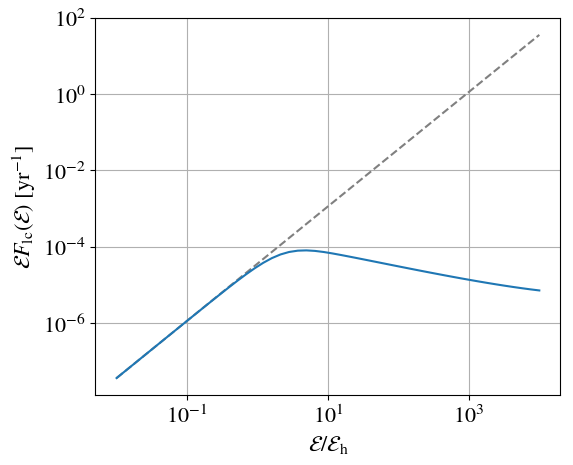

In [2]:
n=nsc_model(Mbh=1.e6*c.msun,  # black hole mass of 1e6 solar masses
            ms=c.msun,        # stellar mass of 1 solar mass
            gamma=2.,         # rho(r) \propto r^-gamma, here we set gamma=2
            rm_o_rh=1.,       # r_m / r_h -- the ratio of the radius enclosing a certain mass of stars to the sphere of influence radius 
            mrm_o_mbh=2.)     # mass in stars / Mbh within r_m

rt = 1*(n.Mbh/n.ms)**(1./3.)*1*n.c.rsun  # specify the tidal radius

alist = np.logspace(np.log10(n.r_h/n.c.pc)+2,np.log10(n.r_h/n.c.pc)-4)*n.c.pc

plt.plot(n.E(alist)/n.E(n.r_h),n.flux_flc(n.E(alist),rt)*n.E(alist)*n.c.yr,color='grey',ls="--")
plt.plot(n.E(alist)/n.E(n.r_h),n.flux_lc(n.E(alist),rt)*n.E(alist)*n.c.yr)

plt.loglog()
plt.xlabel(r'${\cal E} / {\cal E}_{\rm h}$')
plt.ylabel(r"${\cal E} F_{\rm lc}(\cal E)$ [yr$^{-1}$]")
plt.grid()



rate = quad(n.flux_lc,n.E(alist[0]),n.E(alist[-1]),args=(rt))[0]*n.c.yr

# Comparison to Wang & Merritt 2004
# https://arxiv.org/pdf/1307.3268.pdf EQ 33
wmrate = 4.3e-4*(n.sigma_h/9.e6)**(7./2.)*(n.Mbh/(4.e6*n.c.msun))**(-1.) 

print ("======================================================" )
print ("Mbh =",n.Mbh/n.c.msun,"msun" )
print ("sigma =",n.sigma_h/1.e5,"km/s" )
print ("total rate =",rate, "   log10(rate) =",np.log10(rate) )
print ("WM2004 scaled =",wmrate,"   log10(WMrate) =",np.log10(wmrate) )
print ("ratio rate/WMrate =",rate/wmrate )
print ("======================================================" )

# Example varying the tidal radius

For example, if all stars were 1, 10, or 100 $R_\odot$.

('Mbh =', 1000000.0000000001, 'msun')
('sigma =', 53.90025871019213, 'km/s')
('rt=rt_solar:     total rate =', 0.0003352628276726119, '   log10(rate) =', -3.4746145963820982)
('rt=10 rt_solar:  total rate =', 0.0007388892701804561, '   log10(rate) =', -3.1314206400256897)
('rt=100 rt_solar: total rate =', 0.001261514828120887, '   log10(rate) =', -2.8991076403241864)


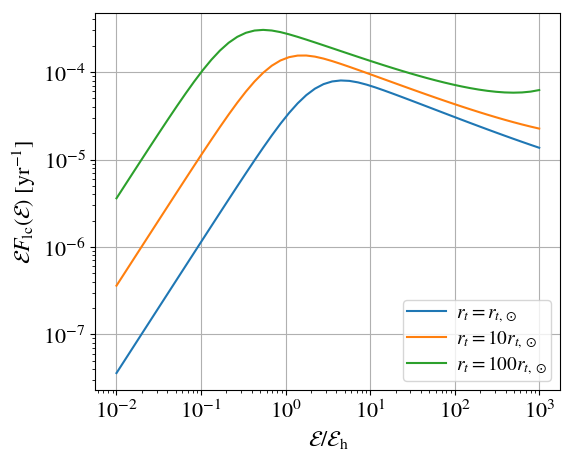

In [11]:
n=nsc_model(Mbh=1.e6*c.msun,  # black hole mass of 1e6 solar masses
            ms=c.msun,        # stellar mass of 1 solar mass
            gamma=2,         # rho(r) \propto r^-gamma, here we set gamma=2
            rm_o_rh=1.,       # r_m / r_h -- the ratio of the radius enclosing a certain mass of stars to the sphere of influence radius 
            mrm_o_mbh=2.)     # mass in stars / Mbh within r_m

rt = 1*(n.Mbh/n.ms)**(1./3.)*1*n.c.rsun  # specify the tidal radius

alist = np.logspace(np.log10(n.r_h/n.c.pc)+2,np.log10(n.r_h/n.c.pc)-3)*n.c.pc

plt.plot(n.E(alist)/n.E(n.r_h),n.flux_lc(n.E(alist),rt)*n.E(alist)*n.c.yr,label=r"$r_t = r_{t,\odot}$")
plt.plot(n.E(alist)/n.E(n.r_h),n.flux_lc(n.E(alist),10*rt)*n.E(alist)*n.c.yr,label=r"$r_t = 10 r_{t,\odot}$")
plt.plot(n.E(alist)/n.E(n.r_h),n.flux_lc(n.E(alist),100*rt)*n.E(alist)*n.c.yr,label=r"$r_t = 100 r_{t,\odot}$")





plt.loglog()
plt.xlabel(r'${\cal E} / {\cal E}_{\rm h}$')
plt.ylabel(r"${\cal E} F_{\rm lc}(\cal E)$ [yr$^{-1}$]")
plt.grid()
plt.legend(loc='best')


rate1 = quad(n.flux_lc,n.E(alist[0]),n.E(alist[-1]),args=(rt))[0]*n.c.yr
rate10 = quad(n.flux_lc,n.E(alist[0]),n.E(alist[-1]),args=(10*rt))[0]*n.c.yr
rate100 = quad(n.flux_lc,n.E(alist[0]),n.E(alist[-1]),args=(100*rt))[0]*n.c.yr
print ("======================================================" )
print ("Mbh =",n.Mbh/n.c.msun,"msun" )
print ("sigma =",n.sigma_h/1.e5,"km/s" )
print ("======================================================" )
print ("rt=rt_solar:     total rate =",rate1, "   log10(rate) =",np.log10(rate1) )
print ("rt=10 rt_solar:  total rate =",rate10, "   log10(rate) =",np.log10(rate10) )
print ("rt=100 rt_solar: total rate =",rate100, "   log10(rate) =",np.log10(rate100) )
